import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

# Define the scope
scope = ['https://spreadsheets.google.com/feeds']

# Add credentials to the account
creds = ServiceAccountCredentials.from_json_keyfile_name('credentials.json', scope)

# Authorize the client
client = gspread.authorize(creds)

# Open the spreadsheet
spreadsheet = client.open('Pocono_House_Info')  # Replace with your spreadsheet name

# Get the first worksheet (or specify the sheet name)
worksheet = spreadsheet.sheet1  # Or: spreadsheet.worksheet("Sheet Name")

# Get all values as a list of lists
data = worksheet.get_all_values()
data = [row[:8] for row in data]

# Convert to Pandas DataFrame (skip the header row if it's already the column names)
df = pd.DataFrame(data[1:], columns=data[0]) # Assumes first row is header. Adjust if needed.

print(df.head()) # Display the first few rows to verify

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [9]:
data = pd.read_csv('Pocono_House_Info.csv', usecols=[0,1,2,3,4,5,6,7])
data.head()

,Address,Price,Beds,Baths,Lakefront,Sq Feet,Sale Date,$/Sq Foot
0,120 Emil's Lane,620000,3,2,0,1300,8/18/22,476.92
1,104 Lane Ct,427911,4,2,0,1404,11/13/23,304.78
2,713 Route 507,605000,6,6,0,3396,9/28/22,178.15
3,136 Pellet Rd,975000,4,3,1,2000,11/2/24,487.50
4,107 Lizzie Ln,455000,3,2,0,1620,11/22/22,280.86


In [19]:
# Define features (X) and target (y)
X = data.drop(['Address','Price','Sale Date','$/Sq Foot'], axis=1) # All columns except 'price'
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 79379931751.60027
R-squared: 0.8283292051966246


In [61]:
model_OLS = sm.OLS(y_train, X_train).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              65.98
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                    7.10e-11
Time:                        19:24:15   Log-Likelihood:                         -321.84
No. Observations:                  23   AIC:                                      651.7
Df Residuals:                      19   BIC:                                      656.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Beds       -7.276e+04   9.08e+04     -0.801      0.433   -2.63e+05    1.17e+05
Baths      -4.837e+04   1.71e+05     -0.283      0.780   -4.06e+05    3.09e+05
Lakefront   6.632e+05    1.3e+05      5.098      0.000    3.91e+05    9.36e+05
Sq Feet      423.6374    148.009      2.862      0.010     113.851     733.424
==============================================================================
Omnibus:                        2.215   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                0.851
Skew:                           0.337   Prob(JB):                        0.654
Kurtosis:                       3.657   Cond. No.                     7.15e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

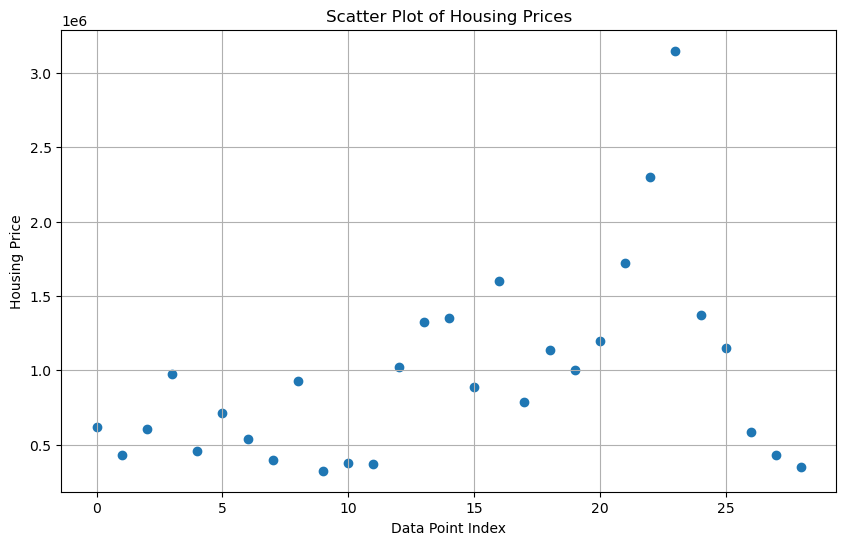

In [24]:
# 1. Basic Scatter Plot (price vs. index):
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(data.index, data['Price']) # df.index gives the row number which can be used as a proxy for any other variable you want to plot against price
plt.xlabel("Data Point Index") # Change the x-label if you plot against another variable
plt.ylabel("Housing Price")
plt.title("Scatter Plot of Housing Prices")
plt.grid(True)  # Add a grid for better readability (optional)
plt.show()

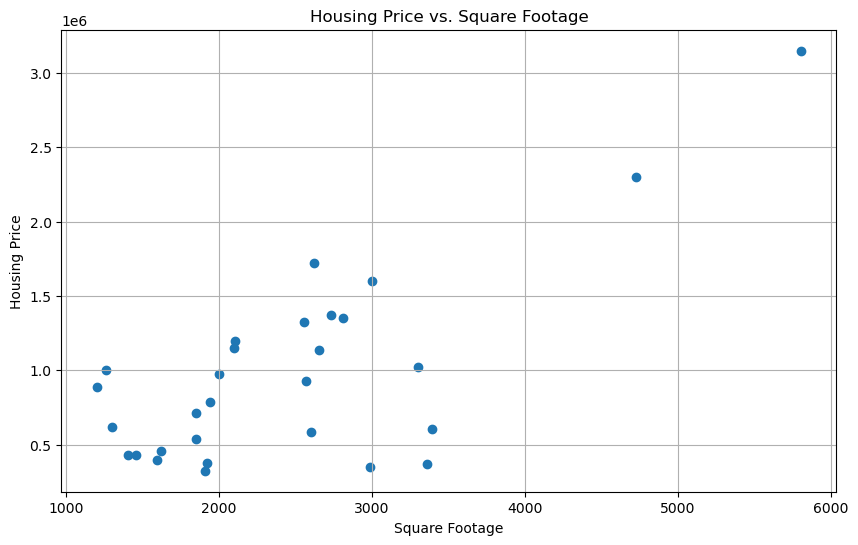

In [27]:
# 2. Scatter Plot with another variable (e.g., square footage):
# First, make sure 'square_footage' or any other variable is numeric
data['Sq Feet'] = pd.to_numeric(data['Sq Feet'], errors='coerce') # convert to number
#data.fillna(data.mean(), inplace=True) # fill any NaN that resulted from the conversion
plt.figure(figsize=(10, 6))
plt.scatter(data['Sq Feet'], data['Price'])
plt.xlabel("Square Footage")
plt.ylabel("Housing Price")
plt.title("Housing Price vs. Square Footage")
plt.grid(True)
plt.show()

In [ ]:
# 3. Scatter Plot with Color Encoding (e.g., by neighborhood):
# Assuming 'neighborhood' is a column in your DataFrame
plt.figure(figsize=(10, 6))
for neighborhood in data['neighborhood'].unique():
    neighborhood_data = df[df['neighborhood'] == neighborhood]
    plt.scatter(neighborhood_data['square_footage'], neighborhood_data['price'], label=neighborhood) # plot each neighborhood separately

plt.xlabel("Square Footage")
plt.ylabel("Housing Price")
plt.title("Housing Price vs. Square Footage (Colored by Neighborhood)")
plt.legend()  # Show the legend for neighborhoods
plt.grid(True)
plt.show()

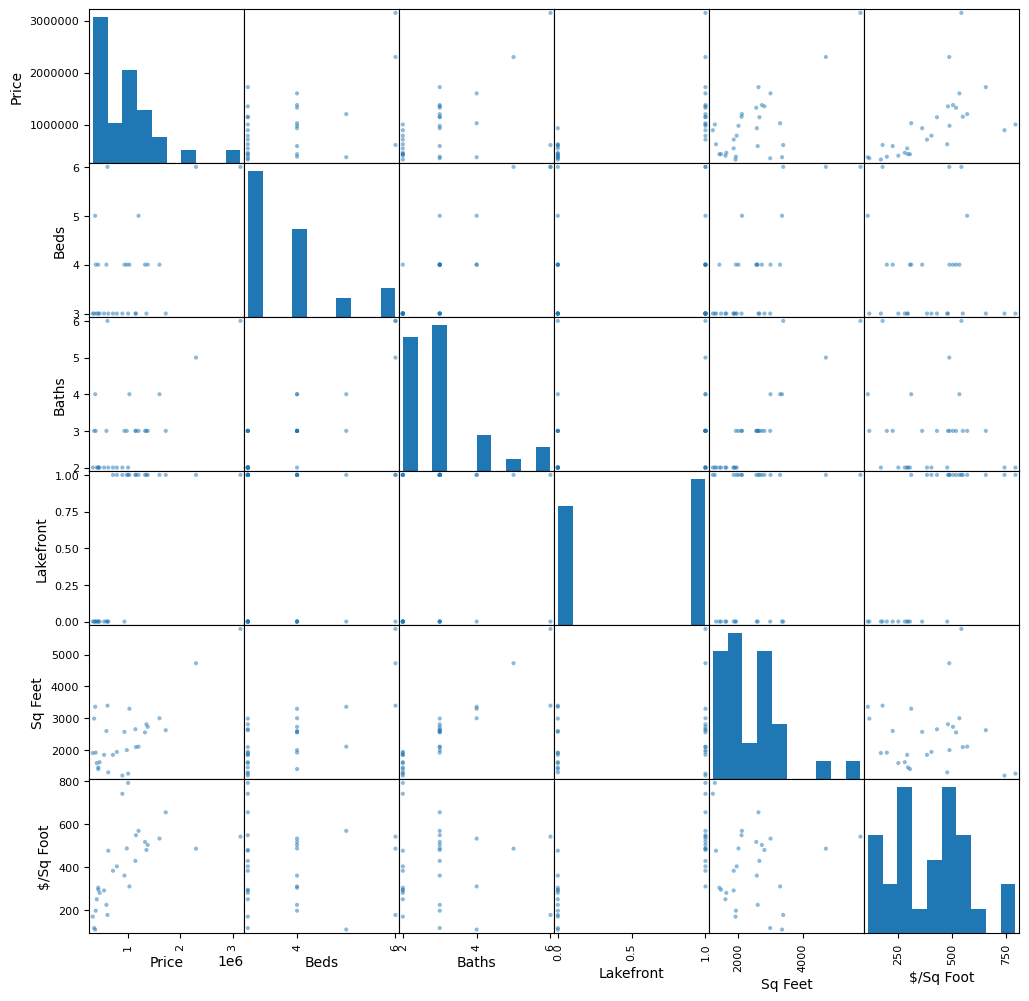

In [29]:
# 4. Scatter matrix to see relationship between all variables
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12, 12)) # plots all variables against each other
plt.show()

In [63]:
# House info for the potential purchase
beds = 5
baths = 3.5
lakefront = 1
sq_feet = 2500

purch_house = pd.DataFrame(columns=data.columns)
purch_house = purch_house.drop(['Address', 'Price', 'Sale Date', '$/Sq Foot'], axis = 1)
purch_house.loc[0, 'Beds'] = beds
purch_house.loc[0, 'Baths'] = baths
purch_house.loc[0, 'Lakefront'] = lakefront
purch_house.loc[0, 'Sq Feet'] = sq_feet

In [64]:
purch_house

,Beds,Baths,Lakefront,Sq Feet
0,5,3.5,1,2500


In [54]:
# Predicted value using 2500 as sq footage
predicted_price = model.predict(purch_house)
print(f"Predicted Price: {predicted_price[0]}")  # predicted_price is a NumPy array, so access the first element

Predicted Price: 1332492.7677225461


In [58]:
# Predicted value using 3000 as sq footage
predicted_price = model.predict(purch_house)
print(f"Predicted Price: {predicted_price[0]}")  # predicted_price is a NumPy array, so access the first element

Predicted Price: 1558715.3744052448


In [65]:
# Predicted value using 2500 as sq footage OLS model
predicted_price = model.predict(purch_house)
print(f"Predicted Price: {predicted_price[0]}")  # predicted_price is a NumPy array, so access the first element

Predicted Price: 1332492.7677225461


In [62]:
# Predicted value using 3000 as sq footage OLS model
predicted_price = model_OLS.predict(purch_house)
print(f"Predicted Price: {predicted_price[0]}")  # predicted_price is a NumPy array, so access the first element

Predicted Price: 1401084.5971297128
